In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import os
os.chdir("F:\\DataScience\\DataSets\\")

In [3]:
dataset=pd.read_csv("PH-Sales.csv")

In [4]:
dataset.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [5]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(dataset))

In [6]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [7]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [8]:
dataset['month']=dates.month

In [9]:
dataset['year']=dates.year

In [10]:
dataset.head(24)

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,1,2003
1,Feb-03,157,2,2003
2,Mar-03,185,3,2003
3,Apr-03,199,4,2003
4,May-03,203,5,2003
5,Jun-03,189,6,2003
6,Jul-03,207,7,2003
7,Aug-03,207,8,2003
8,Sep-03,171,9,2003
9,Oct-03,150,10,2003


In [11]:
import calendar
dataset['month']=dataset['month'].apply(lambda x:calendar.month_abbr[x])

In [12]:
dataset['month'].head(12)

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: month, dtype: object

In [13]:
dataset.head(12)

,Month-Year,Number of Tractor Sold,month,year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003
5,Jun-03,189,Jun,2003
6,Jul-03,207,Jul,2003
7,Aug-03,207,Aug,2003
8,Sep-03,171,Sep,2003
9,Oct-03,150,Oct,2003


In [14]:
dataset.drop(['Month-Year'],axis=1,inplace=True)

In [15]:
dataset.head()

,Number of Tractor Sold,month,year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [16]:
dataset.rename(columns={'Number of Tractor Sold':'Tractor-Sales'},inplace=True)

In [17]:
dataset.head()

,Tractor-Sales,month,year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [18]:
dataset.set_index(dates,inplace=True)

In [19]:
dataset.head()

,Tractor-Sales,month,year
2003-01-01,141,Jan,2003
2003-02-01,157,Feb,2003
2003-03-01,185,Mar,2003
2003-04-01,199,Apr,2003
2003-05-01,203,May,2003


In [20]:
dataset=dataset[['month','year','Tractor-Sales']]

In [21]:
dataset.head()

,month,year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [22]:
#Extract-out the time series
sales_ts=dataset['Tractor-Sales']

In [23]:
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-Sales, dtype: int64

<Figure size 720x360 with 0 Axes>

F:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'year')

Text(0, 0.5, 'no of tractor sale')

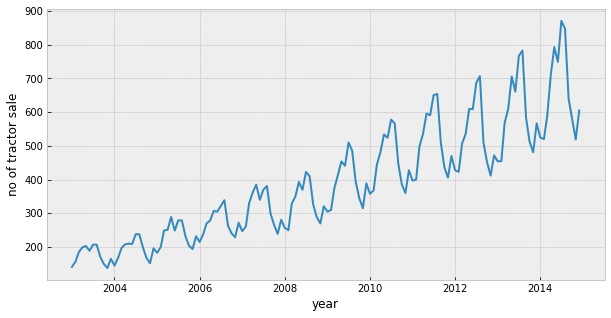

In [24]:
%matplotlib inline
plt.style.use('bmh')
plt.figure(figsize=(10,5))
plt.plot(sales_ts)
plt.xlabel("year")
plt.ylabel("no of tractor sale")

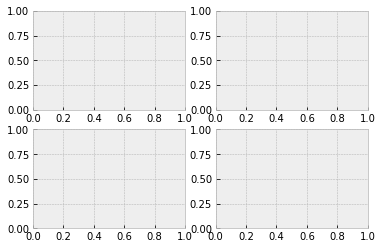

In [25]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
# fig.set_figwidth(14)
# fig.set_figheight(8)

In [26]:
sales_ts.rolling(window=2)

Rolling [window=2,center=False,axis=0]

Text(0.5, 0, 'Years')

Text(0, 0.5, "Number of Tractor's Sold")

Text(0.5, 1.0, '4-Months Moving Average')

Text(0.5, 0, 'Years')

Text(0, 0.5, "Number of Tractor's Sold")

Text(0.5, 1.0, '6-Months Moving Average')

Text(0.5, 0, 'Years')

Text(0, 0.5, "Number of Tractor's Sold")

Text(0.5, 1.0, '8-Months Moving Average')

Text(0.5, 0, 'Years')

Text(0, 0.5, "Number of Tractor's Sold")

Text(0.5, 1.0, '12-Months Moving Average')

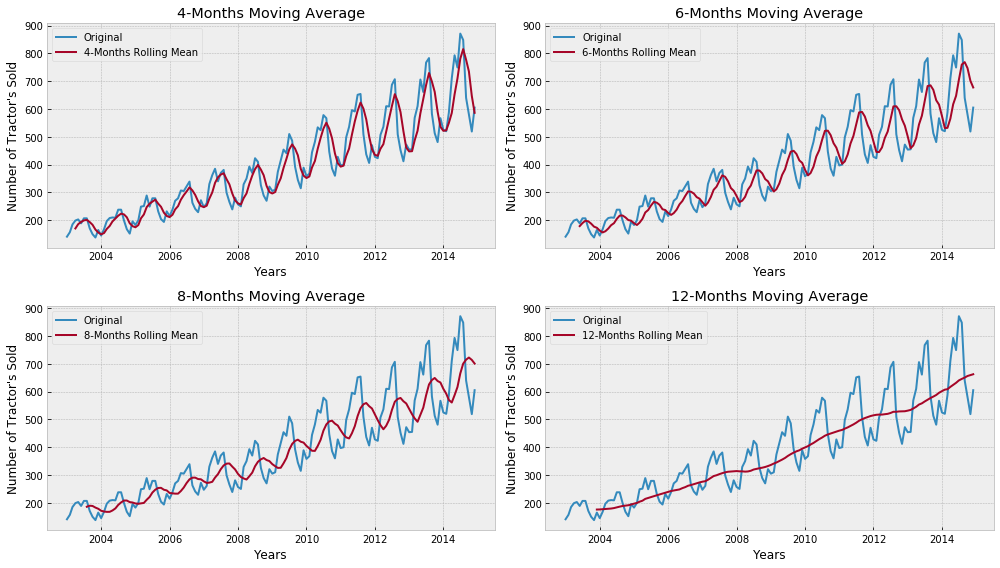

In [27]:
# PH Trend - Time Series Decomposition
# remove wrinkles from our time series using moving average. 
# moving average of different time periods i.e. 4,6,8, and 12 months 
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

In [28]:
# plot the rolling mean and standard deviation on window of 12 months.
# Determing rolling statistics
rolemean=sales_ts.rolling(window=12).mean()
rolestd=sales_ts.rolling(window=12).std()

Text(0.5, 1.0, 'rolling mean and std daviation')

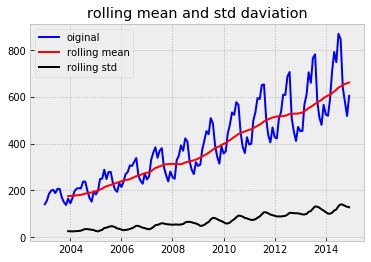

In [29]:
plt.plot(sales_ts,color='blue',label='oiginal')
plt.plot(rolemean,color='red',label='rolling mean')
plt.plot(rolestd,color='black',label='rolling std')
plt.title('rolling mean and std daviation')
plt.legend(loc='best')
plt.show(block=False)

In [30]:
#dickey fuller test
from statsmodels.tsa.stattools import adfuller

In [31]:
dftest=adfuller(sales_ts,autolag='AIC')

In [32]:
dftest

(1.1088250591467375,
 0.995291241524842,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [33]:
dfoutput=pd.Series(dftest[0:4],index=['statical value','p-value','#lags','number of obervation'])

In [34]:
dfoutput

statical value            1.108825
p-value                   0.995291
#lags                    14.000000
number of obervation    129.000000
dtype: float64

In [35]:
for key,value in dftest[4].items():
    dfoutput[key]=value
    
print(dfoutput)    

statical value            1.108825
p-value                   0.995291
#lags                    14.000000
number of obervation    129.000000
1%                       -3.482088
5%                       -2.884219
10%                      -2.578864
dtype: float64


In [36]:
dfoutput['sunny']=24

In [37]:
dfoutput

statical value            1.108825
p-value                   0.995291
#lags                    14.000000
number of obervation    129.000000
1%                       -3.482088
5%                       -2.884219
10%                      -2.578864
sunny                    24.000000
dtype: float64

In [38]:
monthly_dataset=pd.pivot(dataset,values='Tractor-Sales',index='month',columns='year')

In [39]:
monthly_dataset

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [40]:
monthly_dataset=monthly_dataset.reindex(index=['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [41]:
monthly_dataset

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


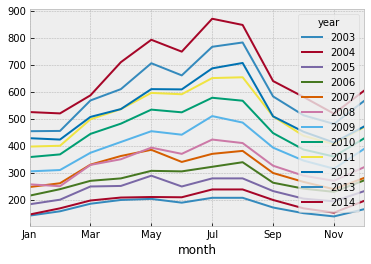

In [42]:
monthly_dataset.plot()

In [43]:
yearly_dataset=pd.pivot(dataset,values='Tractor-Sales',index='year',columns='month')

In [44]:
yearly_dataset[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


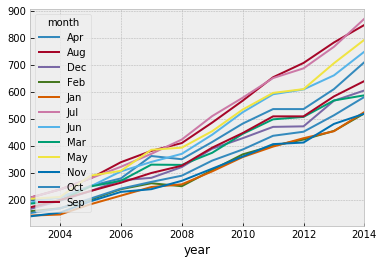

In [45]:
yearly_dataset.plot()

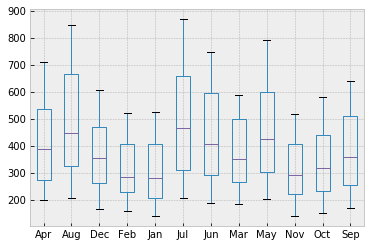

In [46]:
yearly_dataset.boxplot()

In [47]:
# PH Tractor Irregular Remainder
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
decomposition=seasonal_decompose(sales_ts,model='multiplicative')

In [49]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

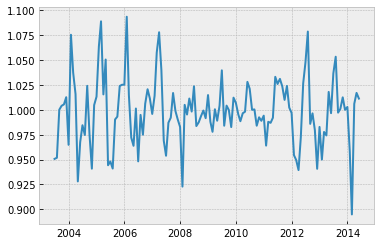

In [50]:
plt.plot(residual)

Text(0.5, 0.98, 'Decomposition of multiplicative time series')

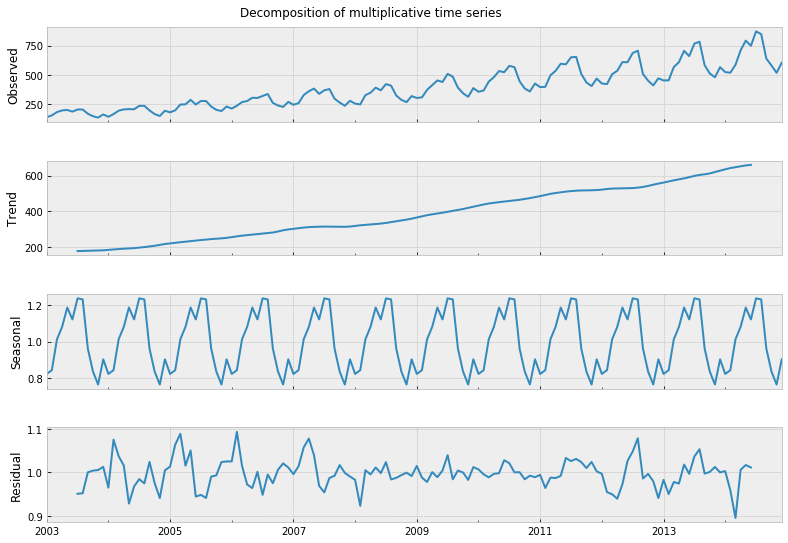

In [51]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [52]:
sales_ts.diff(periods=1).head(10)

2003-01-01     NaN
2003-02-01    16.0
2003-03-01    28.0
2003-04-01    14.0
2003-05-01     4.0
2003-06-01   -14.0
2003-07-01    18.0
2003-08-01     0.0
2003-09-01   -36.0
2003-10-01   -21.0
Freq: MS, Name: Tractor-Sales, dtype: float64

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Tractor Sales')

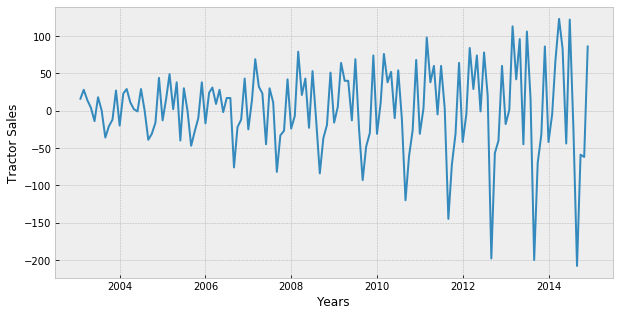

In [53]:
# Step 2: Difference data to make data stationary on mean (remove trend)

plt.figure(figsize=(10, 5))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')


<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Tractor Sales')

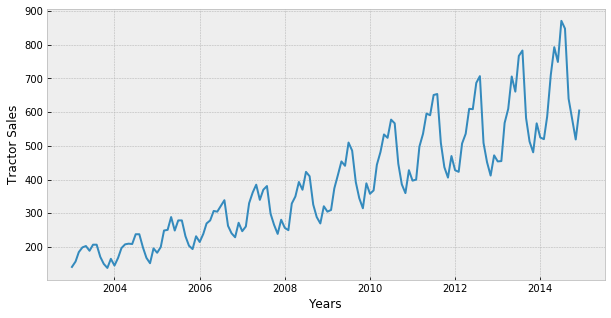

In [54]:

# original
plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Log (Tractor Sales)')

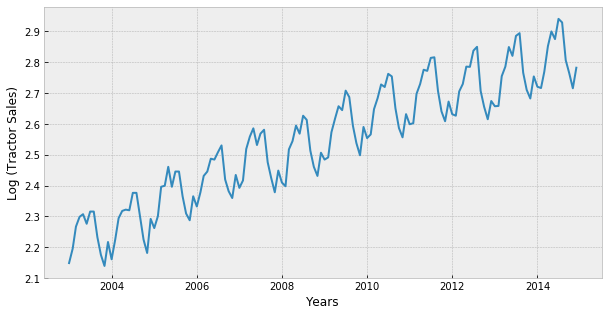

In [55]:
# Step 3: log transform data to make data stationary on variance
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')



<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Years')

Text(0, 0.5, 'Differenced Log (Tractor Sales)')

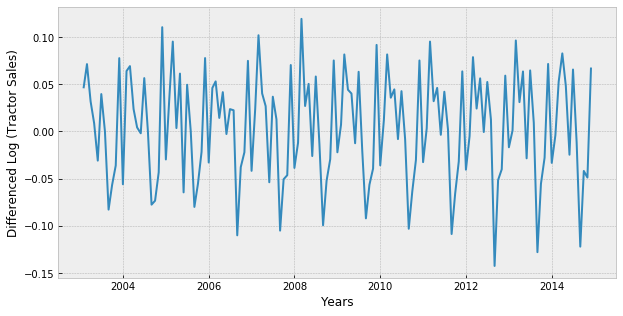

In [56]:

# Step 4: Difference log transform data to make data stationary on both mean and 
# variance 
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')


In [57]:
import warnings
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [58]:
sales_ts_log = np.log10(sales_ts)
len(sales_ts_log)
sales_ts_log.dropna(inplace=True)
len(sales_ts_log)

144

144

2003-01-01    2.149219
2003-02-01    2.195900
2003-03-01    2.267172
2003-04-01    2.298853
2003-05-01    2.307496
Freq: MS, Name: Tractor-Sales, dtype: float64

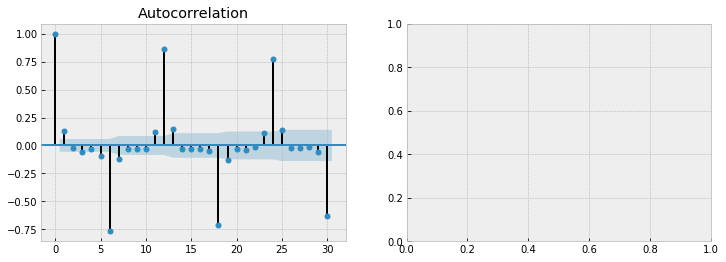

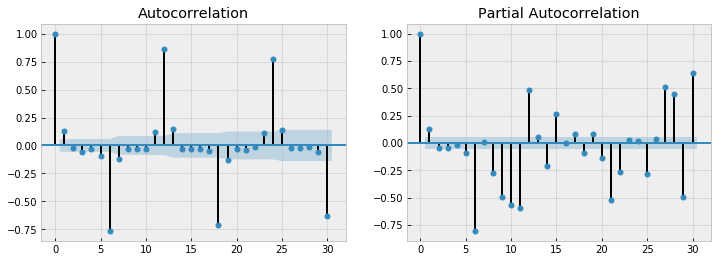

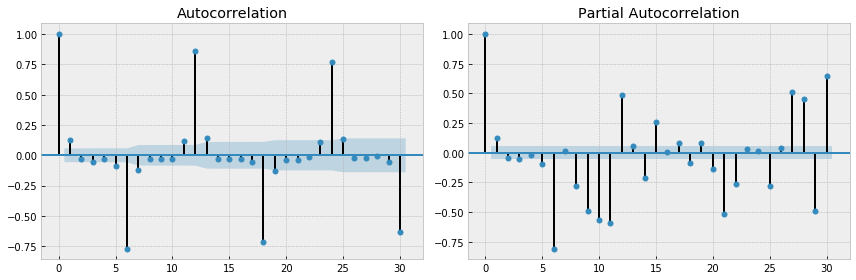

In [59]:
import statsmodels.tsa.api as smt
# Step 5: Plot ACF and PACF to identify potential AR and MA model
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)
sales_ts_log.head(5)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()


In [60]:
p=d=q=range(0, 2)
p
d
q
pdq = list(itertools.product(p, d, q))
pdq
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

range(0, 2)

range(0, 2)

range(0, 2)

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [61]:
# Step 6: Identification of best fit ARIMA model
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
pdq
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-733.7716953293291


In [62]:
p = d = q = range(0, 2)

In [63]:
print(list(p))

[0, 1]


In [64]:
pdq = list(itertools.product(p, d, q))
# pdq

In [65]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [66]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [67]:
#AIC & BIC 
blog_param_order = (0, 1, 1)
blog_param_seasonal_order = (0, 1, 1, 12)
blog_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=blog_param_order,
                                      seasonal_order=blog_param_seasonal_order,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
blog_results = blog_model.fit()
print("Blog SARIMAX{}x{}12 model - AIC:{}".format(blog_param_order, blog_param_seasonal_order, blog_results.aic))


Blog SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:-702.785686028112


In [68]:
# Step 7: Predict sales on in-sample date using the best fit ARIMA model
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()
print(best_results.summary())
#print(best_results.summary().tables[1])

pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 370.886
Date:                            Tue, 18 Feb 2020   AIC                           -733.772
Time:                                    13:12:16   BIC                           -721.920
Sample:                                01-01-2003   HQIC                          -728.956
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3585      0.069     -5.219      0.000      -0.493      -0.224
ar.S.L12       0.9934      0.006   

In [87]:
# Extract the predicted and true values of our time series
len(pred_dynamic.predicted_mean)
sales_ts_truth = sales_ts_log['2012-01-01':]
# sales_ts_truth





36

In [85]:
list(pred_dynamic)

TypeError: 'PredictionResultsWrapper' object is not iterable

The Mean Squared Error of our forecasts is 0.0011


Text(0.5, 0, 'Years')

Text(0, 0.5, 'Tractor Sales')

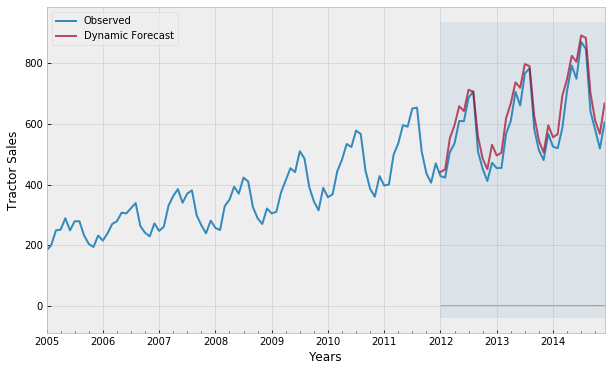

In [71]:

# Compute the mean square error
mse = ((sales_ts_forecasted - sales_ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
# The Mean Squared Error of our forecasts is 0.0011
axis = sales_ts['2005':].plot(label='Observed', figsize=(10, 6))
np.power(10, pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), sales_ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

In [72]:
mse = ((sales_ts_forecasted - sales_ts_truth) ** 2).mean()

In [73]:
mse

0.0010845213962381271

In [74]:
sales_ts_forecasted

2012-01-01    2.645115
2012-02-01    2.652975
2012-03-01    2.742287
2012-04-01    2.775386
2012-05-01    2.818589
2012-06-01    2.807855
2012-07-01    2.853002
2012-08-01    2.849052
2012-09-01    2.747070
2012-10-01    2.686262
2012-11-01    2.653982
2012-12-01    2.725328
2013-01-01    2.695356
2013-02-01    2.703165
2013-03-01    2.791892
2013-04-01    2.824774
2013-05-01    2.867694
2013-06-01    2.857030
2013-07-01    2.901881
2013-08-01    2.897957
2013-09-01    2.796643
2013-10-01    2.736233
2013-11-01    2.704165
2013-12-01    2.775044
2014-01-01    2.745268
2014-02-01    2.753026
2014-03-01    2.841171
2014-04-01    2.873838
2014-05-01    2.916477
2014-06-01    2.905883
2014-07-01    2.950440
2014-08-01    2.946542
2014-09-01    2.845892
2014-10-01    2.785878
2014-11-01    2.754019
2014-12-01    2.824434
Freq: MS, dtype: float64

In [75]:
sales_ts_truth

2012-01-01    2.631444
2012-02-01    2.626340
2012-03-01    2.705008
2012-04-01    2.729165
2012-05-01    2.785330
2012-06-01    2.784617
2012-07-01    2.836957
2012-08-01    2.849419
2012-09-01    2.706718
2012-10-01    2.655138
2012-11-01    2.614897
2012-12-01    2.673942
2013-01-01    2.657056
2013-02-01    2.658011
2013-03-01    2.754348
2013-04-01    2.785330
2013-05-01    2.848805
2013-06-01    2.820201
2013-07-01    2.884795
2013-08-01    2.893762
2013-09-01    2.765669
2013-10-01    2.710117
2013-11-01    2.682145
2013-12-01    2.753583
2014-01-01    2.720159
2014-02-01    2.716003
2014-03-01    2.768638
2014-04-01    2.851258
2014-05-01    2.899273
2014-06-01    2.874482
2014-07-01    2.940018
2014-08-01    2.928396
2014-09-01    2.806180
2014-10-01    2.764176
2014-11-01    2.715167
2014-12-01    2.781755
Freq: MS, Name: Tractor-Sales, dtype: float64

In [76]:
# Step 8: Forecast sales using the best fit ARIMA model
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI


In [77]:
# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()
n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()


,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,567.466839,528.260376,609.583131,528.260376,609.583131
2015-01-01,566.277162,520.101959,616.551849,520.101959,616.551849
2015-02-01,669.138929,607.483557,737.051894,607.483557,737.051894
2015-03-01,755.238018,678.585319,840.549373,678.585319,840.549373
2015-04-01,850.237596,756.766117,955.254145,756.766117,955.254145


Text(0.5, 0, 'Years')

Text(0, 0.5, 'Tractor Sales')

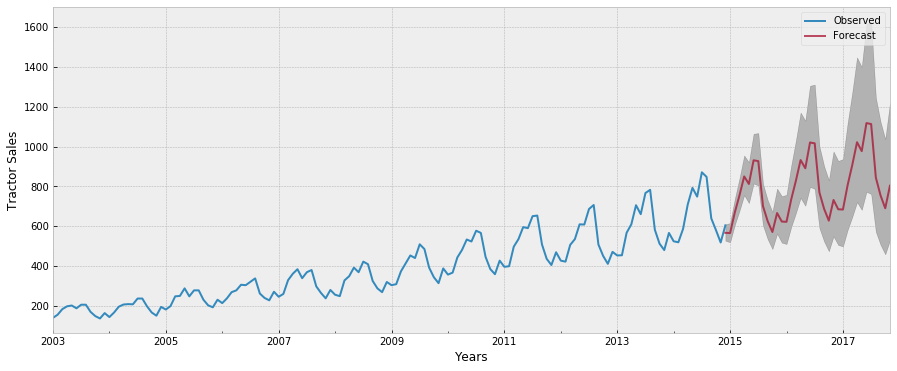

In [78]:
# plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

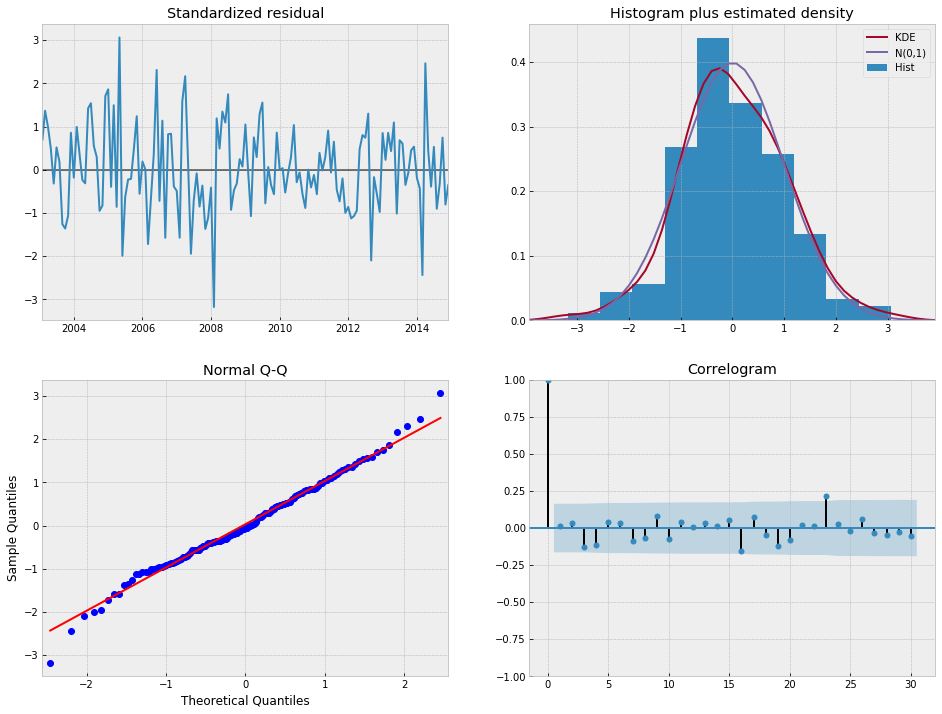

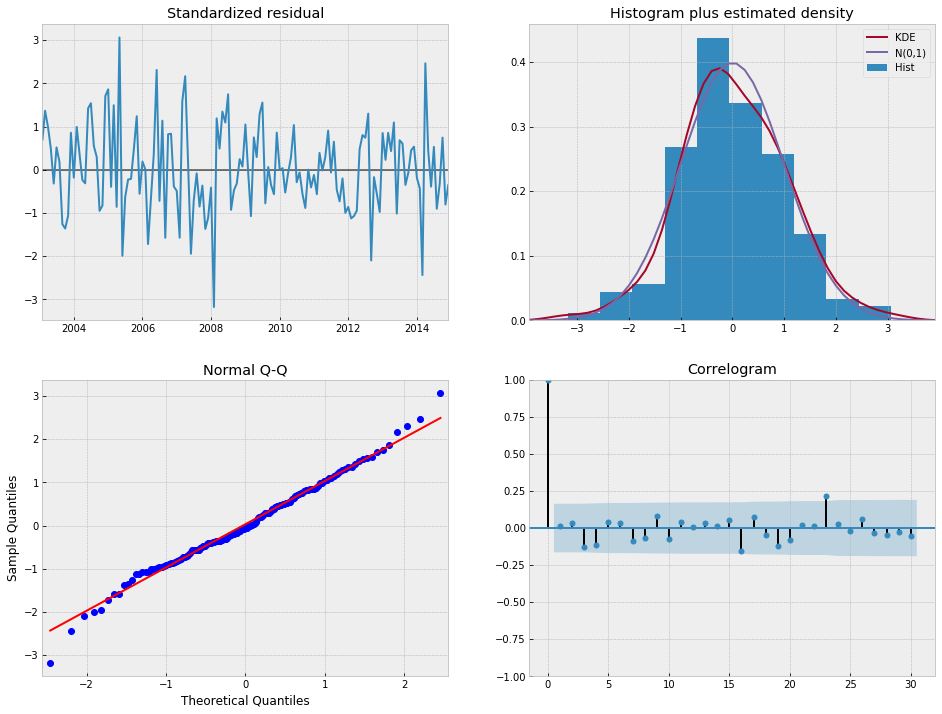

In [79]:

# Step 9: Plot ACF and PACF for residuals of ARIMA model to ensure no 
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()
